In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pywt
%matplotlib inline

In [5]:
chunk_size = 1500000

In [6]:
data = pd.read_csv('train.csv', chunksize=chunk_size, dtype={'acoustic_data': np.int64, 'time_to_failure': np.float64})

In [7]:
freq_sample = 1000000000
freq_period = 1 / freq_sample

In [16]:
def cwt(data, wavename, totalscal):
    wcf = pywt.centrfrq(wavename)
    cparam = 2 * wcf * totalscal
    a = [i for i in range(totalscal, 0, -1)]
    scal = [cparam / i for i in a]
    coe = pywt.cwt(data, scal, wavename)
    mat = [abs(i) for i in coe[0]]
    freq = pywt.scale2frequency(wavename, scal) * fs

In [9]:
chunks = []
loop = True
while loop:
    try:
        chunk = data.get_chunk(chunk_size)
        chunk['time_to_failure'] = chunk['time_to_failure'].apply(lambda x: 1000*x)
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped.")

Iteration is stopped.


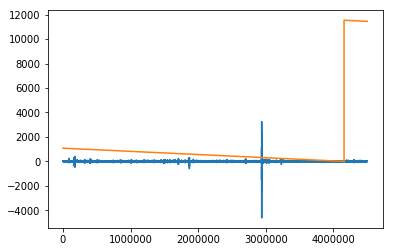

In [10]:
period =  pd.concat([chunks[1], chunks[2], chunks[3]], ignore_index=True)
plt.plot(period['acoustic_data'])
plt.plot(period['time_to_failure'])
plt.show()

In [17]:
mat = cwt(chunks[0]['acoustic_data'], 'cmor3-3', 150)
spectrum = plt.figure(0, (20, 20))
plt.imshow(mat)
spectrum.show()

AttributeError: module 'pywt' has no attribute 'centrfrq'